### Importación de datos



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head() #

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [24]:
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso total tienda 1: $ {ingreso_tienda1:,.2f}")
print(f"Ingreso total tienda 2: $ {ingreso_tienda2:,.2f}")
print(f"Ingreso total tienda 3: $ {ingreso_tienda3:,.2f}")
print(f"Ingreso total tienda 4: $ {ingreso_tienda4:,.2f}")


Ingreso total tienda 1: $ 1,150,880,400.00
Ingreso total tienda 2: $ 1,116,343,500.00
Ingreso total tienda 3: $ 1,098,019,600.00
Ingreso total tienda 4: $ 1,038,375,700.00


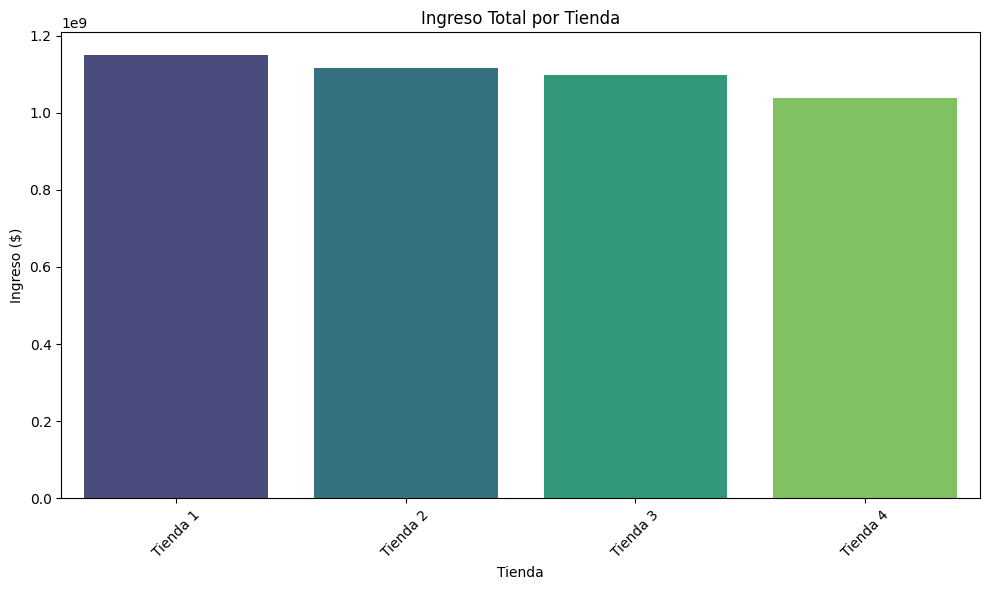

In [45]:
ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})
# Graficar los ingresos
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Ingreso', data=ingresos, palette='viridis', hue='Tienda', legend=False)
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [11]:
categorias_tienda1 = tienda['Categoría del Producto'].value_counts()
categorias_tienda2 = tienda2['Categoría del Producto'].value_counts()
categorias_tienda3 = tienda3['Categoría del Producto'].value_counts()
categorias_tienda4 = tienda4['Categoría del Producto'].value_counts()

print(f"\nCategorías en tienda 1: {categorias_tienda1}")
print(f"\nCategorías en tienda 2: {categorias_tienda2}")
print(f"\nCategorías en tienda 3: {categorias_tienda3}")
print(f"\nCategorías en tienda 4: {categorias_tienda4}")


Categorías en tienda 1: Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Categorías en tienda 2: Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Categorías en tienda 3: Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Categorías en tienda 4: Categoría

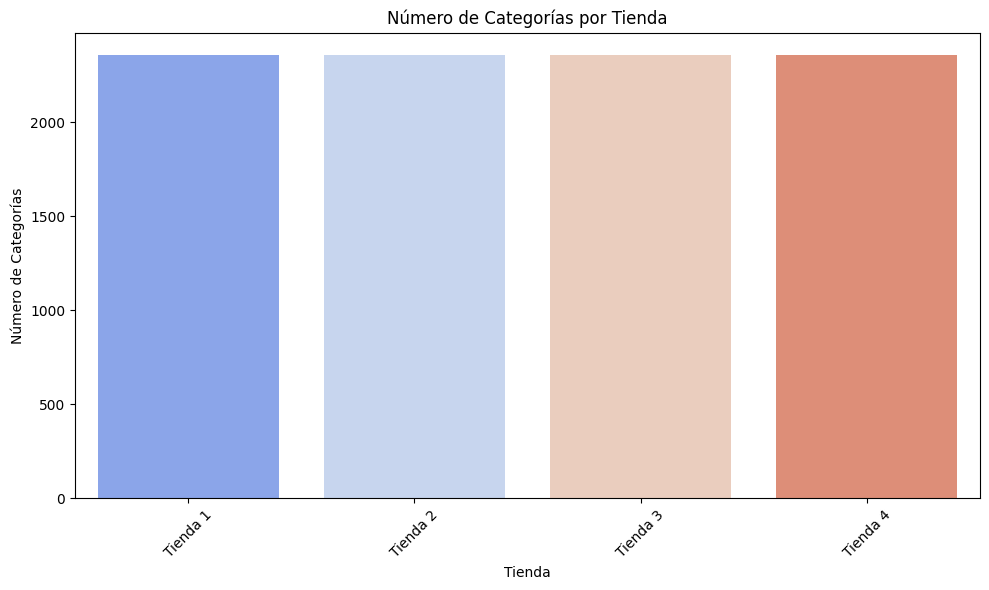

In [44]:
# ========== 2.  Grafico para Ventas por categoría ==========
# Crear un DataFrame para las categorías
categorias = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Categorías': [categorias_tienda1.sum(), categorias_tienda2.sum(), categorias_tienda3.sum(), categorias_tienda4.sum()]
})
# Graficar las categorías
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Categorías', data=categorias, palette='coolwarm', hue='Tienda', legend=False)
plt.title('Número de Categorías por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de Categorías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [13]:
calificacion_tienda1 = tienda['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio tienda 1: {calificacion_tienda1:.2f}")
print(f"Calificación promedio tienda 2: {calificacion_tienda2:.2f}")
print(f"Calificación promedio tienda 3: {calificacion_tienda3:.2f}")
print(f"Calificación promedio tienda 4: {calificacion_tienda4:.2f}")

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


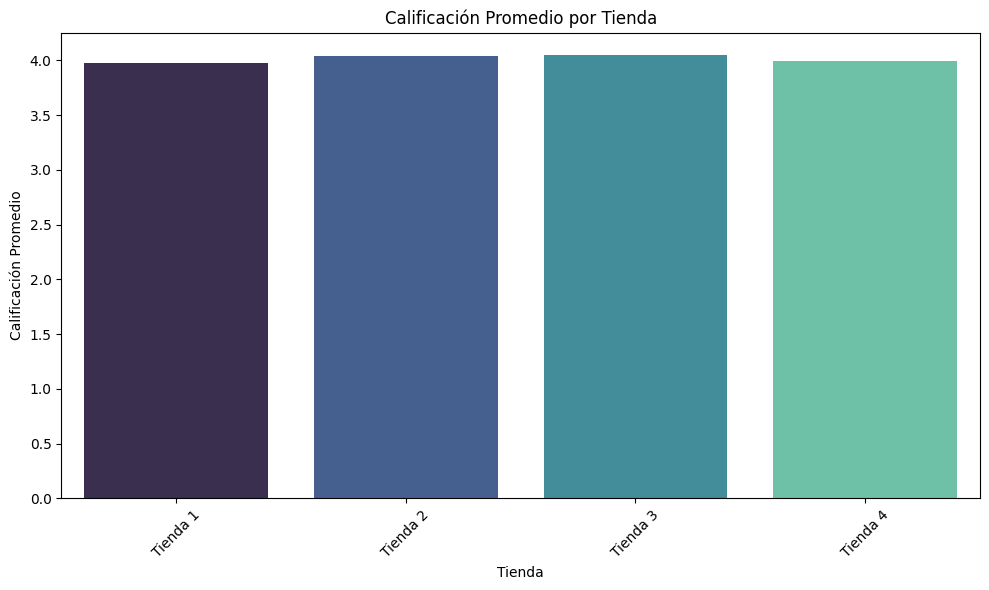

In [48]:
# ========== 3.  Grafico para Calificación promedio de la tienda ==========
# Crear un DataFrame para las calificaciones
calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación': [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
})
# Graficar las calificaciones
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Calificación', data=calificaciones, palette='mako', hue='Tienda', legend=False)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [50]:
# Productos más vendidos
productos_mas_vendidos_tienda1 = tienda['Producto'].value_counts().head(5)
productos_mas_vendidos_tienda2 = tienda2['Producto'].value_counts().head(5)
productos_mas_vendidos_tienda3 = tienda3['Producto'].value_counts().head(5)
productos_mas_vendidos_tienda4 = tienda4['Producto'].value_counts().head(5)

# Productos menos vendidos
productos_menos_vendidos_tienda1 = tienda['Producto'].value_counts().tail(5)
productos_menos_vendidos_tienda2 = tienda2['Producto'].value_counts().tail(5)
productos_menos_vendidos_tienda3 = tienda3['Producto'].value_counts().tail(5)
productos_menos_vendidos_tienda4 = tienda4['Producto'].value_counts().tail(5)

# Productos más vendidos
print(f"\nProductos más vendidos tienda 1: {productos_mas_vendidos_tienda1}")
print(f"\nProductos más vendidos tienda 2: {productos_mas_vendidos_tienda2}")
print(f"\nProductos más vendidos tienda 3: {productos_mas_vendidos_tienda3}")
print(f"\nProductos más vendidos tienda 4: {productos_mas_vendidos_tienda4}")

# Productos menos vendidos
print(f"\nProductos menos vendidos tienda 1: {productos_menos_vendidos_tienda1}")
print(f"\nProductos menos vendidos tienda 2: {productos_menos_vendidos_tienda2}")
print(f"\nProductos menos vendidos tienda 3: {productos_menos_vendidos_tienda3}")
print(f"\nProductos menos vendidos tienda 4: {productos_menos_vendidos_tienda4}")


Productos más vendidos tienda 1: Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos más vendidos tienda 2: Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos más vendidos tienda 3: Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Productos más vendidos tienda 4: Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Productos menos vendidos tienda 1: Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      3

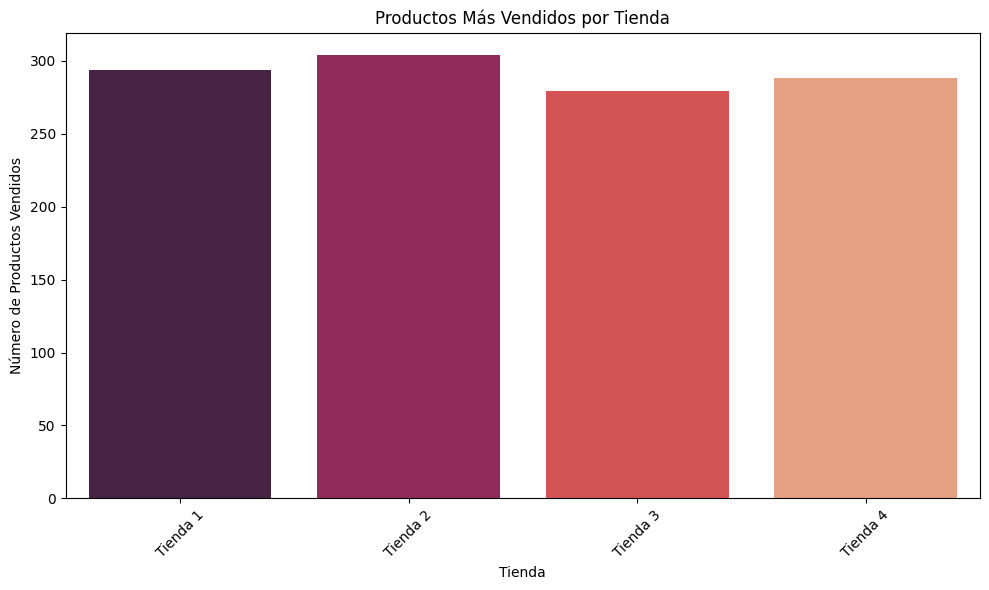

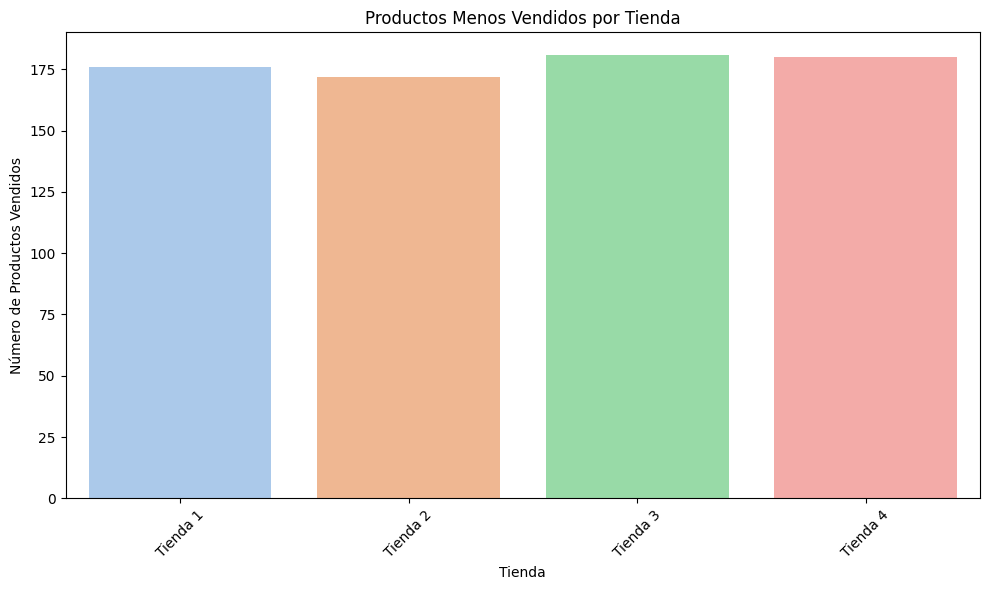

In [52]:

# ========== 4.  Grafico para Productos más vendidos y productor menos vendidos ==========
# Crear un DataFrame para los productos más vendidos
productos_mas_vendidos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Productos Más Vendidos': [
        productos_mas_vendidos_tienda1.sum(),
        productos_mas_vendidos_tienda2.sum(),
        productos_mas_vendidos_tienda3.sum(),
        productos_mas_vendidos_tienda4.sum()
    ]
})
# Graficar los productos más vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Productos Más Vendidos', data=productos_mas_vendidos, palette='rocket', hue='Tienda', legend=False)
plt.title('Productos Más Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de Productos Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Crear un DataFrame para los productos menos vendidos
productos_menos_vendidos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Productos Menos Vendidos': [
        productos_menos_vendidos_tienda1.sum(),
        productos_menos_vendidos_tienda2.sum(),
        productos_menos_vendidos_tienda3.sum(),
        productos_menos_vendidos_tienda4.sum()
    ]
})
# Graficar los productos menos vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Productos Menos Vendidos', data=productos_menos_vendidos, palette='pastel', hue='Tienda', legend=False)
plt.title('Productos Menos Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de Productos Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [42]:
envio_promedio_tienda1 = tienda['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio tienda 1: {envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio tienda 2: {envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio tienda 3: {envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio tienda 4: {envio_promedio_tienda4:.2f}")

Costo de envío promedio tienda 1: 26018.61
Costo de envío promedio tienda 2: 25216.24
Costo de envío promedio tienda 3: 24805.68
Costo de envío promedio tienda 4: 23459.46


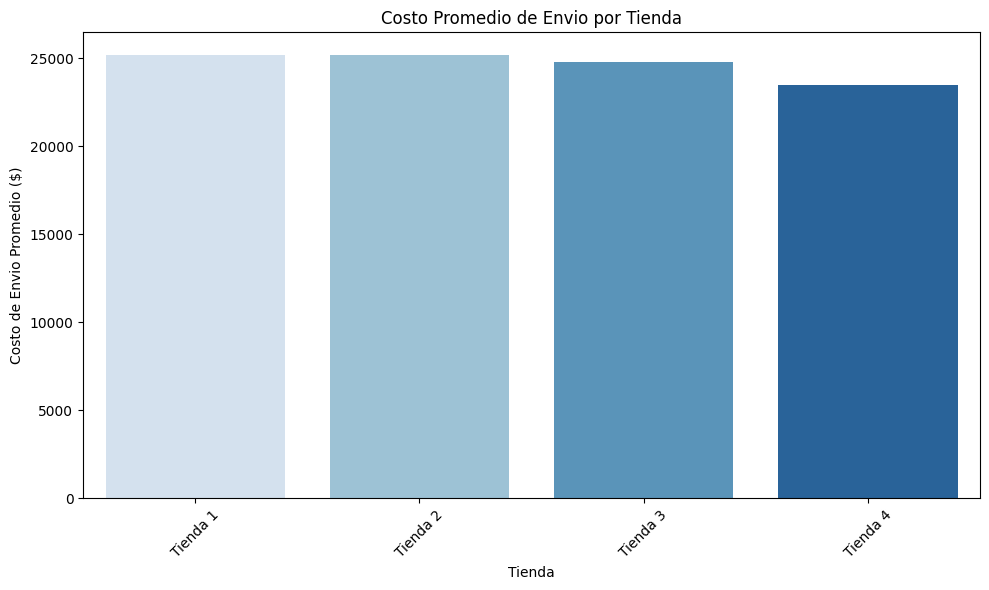

In [43]:
# Calcular el costo promedio de envío de cada tienda
envio_promedio_tienda1 = tienda2['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()
# Crear un DataFrame para los envíos
envios = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]
})
# Graficar los envíos
plt.figure(figsize=(10, 6))
# sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=envios, palette='Blues')
sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=envios, palette='Blues', hue='Tienda', legend=False)
plt.title('Costo Promedio de Envio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envio Promedio ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()